In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [13]:
control_df = df.query('group == "control"')

In [17]:
control_ctr = control_df.query('action == "enroll"').id.nunique()/control_df.query('action == "view"').id.nunique()
control_ctr

0.2364438839848676

In [23]:
experiment_df = df.query('group == "experiment"')

In [22]:
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique()/experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.2668693009118541

In [24]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030425416926986526

In [25]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    boots_sample = df.sample(size, replace=True)
    control_df = boots_sample.query('group == "control"')
    control_ctr = control_df.query('action == "enroll"').id.nunique()/control_df.query('action == "view"').id.nunique()
    experiment_df = boots_sample.query('group == "experiment"')
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique()/experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

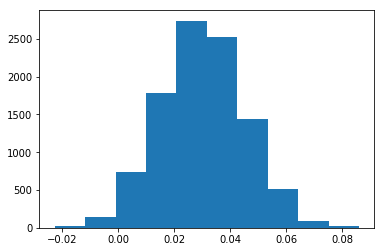

In [28]:
diffs = np.array(diffs)
# Plot sampling distribution
plt.hist(diffs);

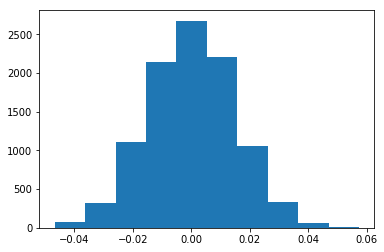

In [29]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

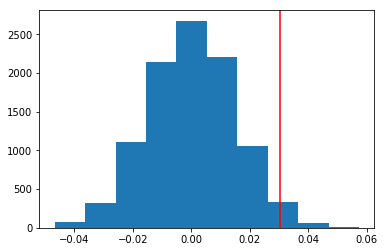

In [32]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red');

In [33]:
# Compute p-value
(null_vals > obs_diff).mean()

0.0216